In [3]:
import pandas as pd 
from pandas._libs.tslibs import period
from pandas.core.indexes.datetimes import date_range
import time
from datetime import datetime
import time
import csv
import shutil
import pathlib
from pathlib import Path 
from csv import DictReader
import random

In [42]:
from prophet import Prophet
import pandas_ta as ta
import plotly.express as px
import plotly.graph_objs as go
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [5]:
dados = pd.read_csv('dados_telemetrias.csv')

In [6]:
dados.head()

,CD_DISPOSITIVO,CD_NOME_TAG,VALUE,DT_MODBUS,ALARM,NM_EQUIPAMENTO,DT_MODBUS_CONV
0,ERPRC5201,ERP_ERPRC5201_BATTERY_REMAINING_CAPACITY,77,1658015230,False,CDC,2022-07-16T23:47:12.000+0000
1,ERPCA55507,ERP_ERPCA55507_BATTERY_REMAINING_CAPACITY,75,1658015740,False,CDC,2022-07-16T23:55:44.000+0000
2,CRM4000813490,CRM_CRM4000813490_BATTERY_REMAINING_CAPACITY,71,1658015870,False,CDC,2022-07-16T23:57:52.000+0000
3,CRM518097,CRM_CRM518097_BATTERY_REMAINING_CAPACITY,75,1658016000,False,CDC,2022-07-17T00:00:00.000+0000
4,CRM516186,CRM_CRM516186_BATTERY_REMAINING_CAPACITY,73,1658016000,False,CDC,2022-07-17T00:00:00.000+0000


In [9]:
dados.drop(['CD_DISPOSITIVO','CD_NOME_TAG','ALARM','NM_EQUIPAMENTO','DT_MODBUS_CONV'],axis=1 , inplace=True)

In [10]:
dados = dados.rename(columns={'DT_MODBUS':'ds','VALUE':'y'})

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # IMPORTE NECESSARIO PARA A DIVISÃO ENTRE TREINO E TESTE 

In [12]:
dados_treino , dados_teste = train_test_split(dados,test_size=0.3,shuffle=True)

In [13]:
dados_treino.head()

,y,ds
190,64,2022-07-17 07:17:20
428,84,2022-07-17 19:39:40
659,45,2022-07-18 04:52:20
485,76,2022-07-17 22:15:30
860,99,2022-07-18 13:56:20


In [14]:
dados_teste.head()

,y,ds
347,99,2022-07-17 15:40:50
841,99,2022-07-18 12:39:30
418,99,2022-07-17 19:07:40
713,61,2022-07-18 06:36:50
467,78,2022-07-17 21:39:10


In [15]:
modelo1 = Prophet() # A PARTIR DESSE CELULA E APLICADO A TREINO COM OS DADOS APURADOS 
modelo1.fit(dados_teste)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
m = Prophet(daily_seasonality=True)

In [17]:
m.fit(dados_treino)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [18]:
future = m.make_future_dataframe(periods=7)

In [19]:
forecast = m.predict(future)

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [23]:
previsao = m.predict(future) #iniciando a previsão do treino

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [24]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
537,2022-07-21 20:07:30,67.933004,58.323066,97.705091,67.844610,68.019856,10.144359,10.144359,10.144359,10.144359,10.144359,10.144359,0.0,0.0,0.0,78.077363
538,2022-07-22 20:07:30,66.366611,55.644445,95.961163,66.226023,66.507899,10.144359,10.144359,10.144359,10.144359,10.144359,10.144359,0.0,0.0,0.0,76.510970
539,2022-07-23 20:07:30,64.800219,57.786155,95.642983,64.604115,64.998376,10.144359,10.144359,10.144359,10.144359,10.144359,10.144359,0.0,0.0,0.0,74.944578
540,2022-07-24 20:07:30,63.233826,54.410174,91.382785,62.969373,63.496614,10.144359,10.144359,10.144359,10.144359,10.144359,10.144359,0.0,0.0,0.0,73.378185
541,2022-07-25 20:07:30,61.667433,52.848272,91.631409,61.332050,62.004984,10.144359,10.144359,10.144359,10.144359,10.144359,10.144359,0.0,0.0,0.0,71.811792


In [32]:
previsao [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-07-17 00:00:00,71.642689,52.486748,91.099819
1,2022-07-17 00:10:40,71.560479,51.621803,92.032158
2,2022-07-17 00:15:00,71.516701,51.878665,90.570322
3,2022-07-17 00:17:00,71.494111,54.095672,90.821139
4,2022-07-17 00:19:10,71.467820,51.473716,91.141986


In [39]:
previsao [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
537,2022-07-21 20:07:30,78.077363,58.323066,97.705091
538,2022-07-22 20:07:30,76.510970,55.644445,95.961163
539,2022-07-23 20:07:30,74.944578,57.786155,95.642983
540,2022-07-24 20:07:30,73.378185,54.410174,91.382785
541,2022-07-25 20:07:30,71.811792,52.848272,91.631409


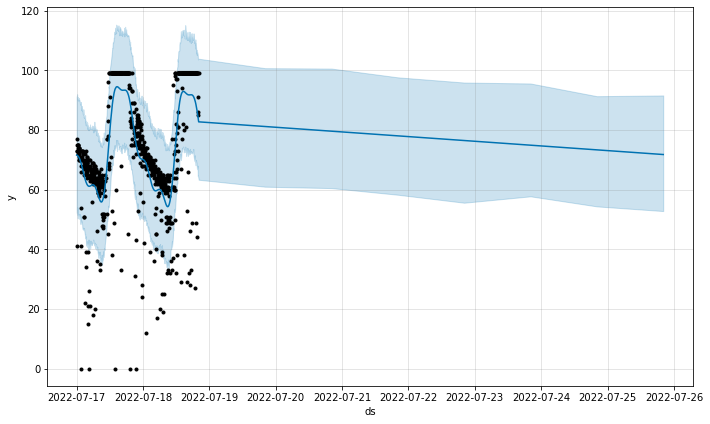

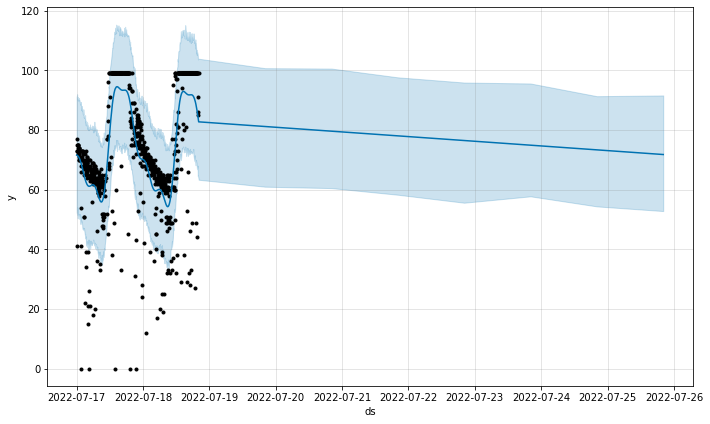

In [44]:
m.plot(previsao)
#px.show()

c:\Users\BlueShift\anaconda3.1\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



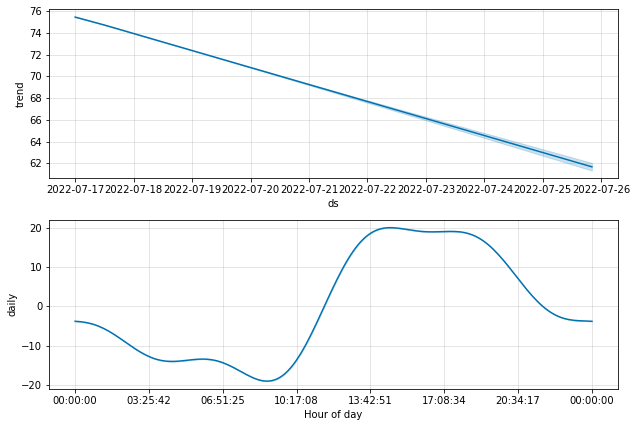

In [57]:
fig2 = m.plot_components(forecast)


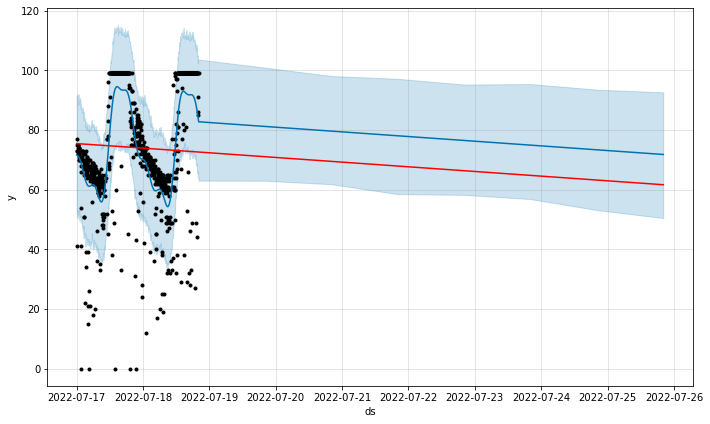

In [58]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
#Grafico de tendencia 